In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [24]:
data = np.load("output_files/output_1.npz")

In [25]:
data.keys()

['vth', 'theta', 'p', 'vph', 'phi', 't', 'om']

In [26]:
data["vth"].shape # number of phis, number of thetas



(256, 128)

In [27]:
data["theta"].size

128

<IPython.core.display.Javascript object>


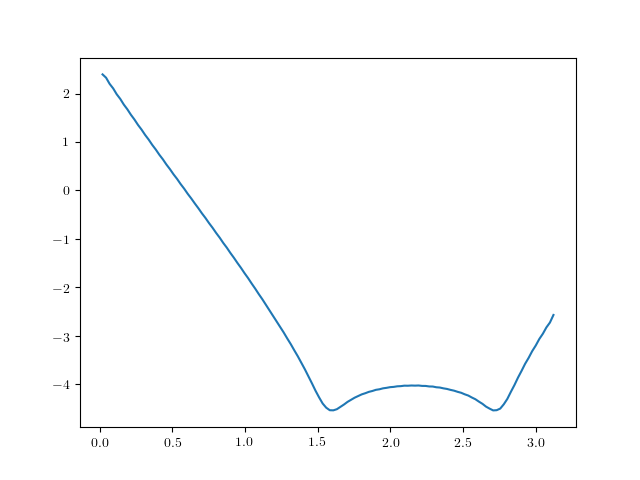

In [28]:
fig1 = plt.figure()
plt.plot(data["theta"],data["vph"][0,:]) # 0 tp pi in x b/c colatitude

<IPython.core.display.Javascript object>


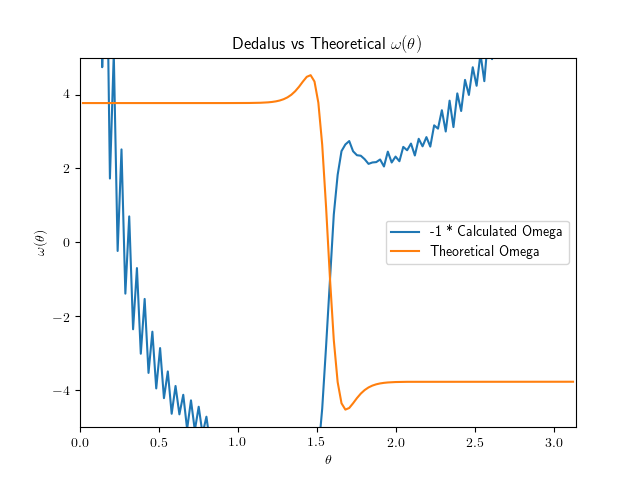

In [88]:
Gamma = 6*np.pi/5 # make Gamma negative to see how the graphs compare in value --- very close!
delta_th = 0.1
theta_theo = data["theta"]
lat = theta_theo - np.pi/2

def cot(x):
    return 1/np.tan(x)

om_theo = Gamma * ( ( (np.tanh(lat/delta_th)/2) + (lat*(1-np.tanh(lat/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat*np.tanh(lat/delta_th)/2) + np.pi/4)**2) + (cot( (lat*np.tanh(lat/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )

fig2 = plt.figure()
plt.rc('text', usetex=True)
plt.plot(data["theta"],-data["om"][0,:],label = '-1 * Calculated Omega')
plt.plot(data["theta"],om_theo,label = 'Theoretical Omega')
plt.xlim(0, np.pi)
plt.xlabel(r'\theta')
plt.ylim(-5,5)
plt.ylabel(r'\omega(\theta)')
plt.title('Dedalus vs Theoretical 'r'\omega(\theta)')
plt.legend(loc='right')
# Questions 11/1/17
# how do I interpret these results physically?

<IPython.core.display.Javascript object>


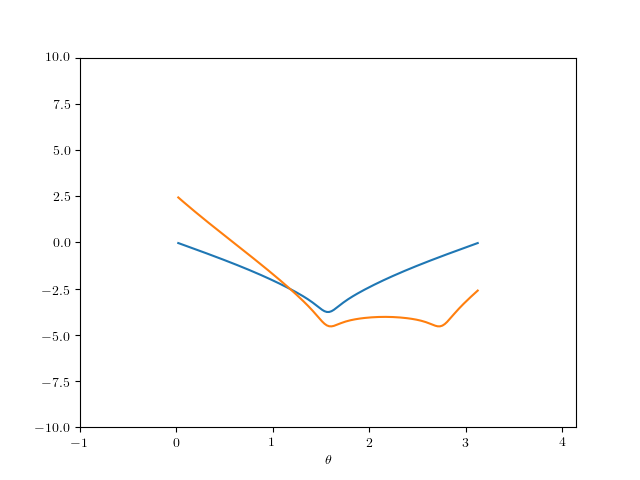

<function matplotlib.pyplot.show>

In [19]:
lat2 = (theta_theo - 7*np.pi/8)

# Mess with plot to create two jets
fig3 = plt.figure()
plt.rc('text', usetex=True)
# Original u_jet
# u_jet = Gamma*np.tan( lat*np.tanh( lat/delta_th )/2 - np.pi/4)
u_jet =  Gamma*np.tan( lat*np.tanh(lat/delta_th)/2 - np.pi/4 )
u_jet2 =  Gamma*np.tan( lat2*np.tanh(lat2/delta_th)/2 - np.pi/4 )
u_jet3 = u_jet + u_jet2
plt.plot(theta_theo,u_jet,label='u_jet')
plt.plot(theta_theo,u_jet3,label='u_jet3')
plt.xlim(-1,np.pi+1)
plt.xlabel(r'\theta')
plt.ylim(-10,10)
#plt.ylabel(r'\ u_{jet}(theta)')
plt.show

In [21]:
data2 = np.load("output_files/output_1.npz")

<IPython.core.display.Javascript object>


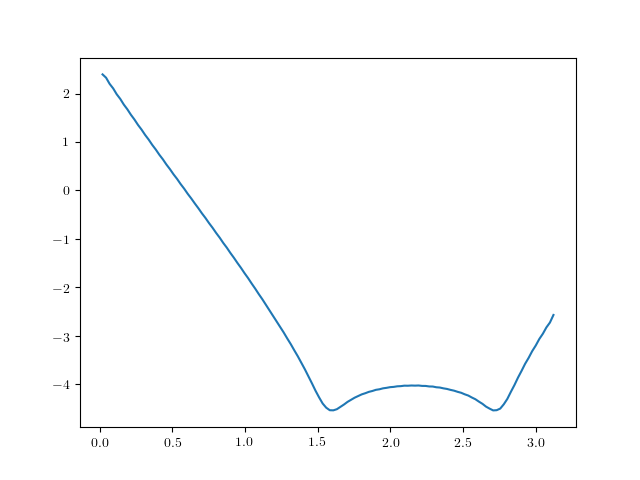

In [37]:
fig4 = plt.figure()
plt.plot(data2["theta"],data2["vph"][0,:])

<IPython.core.display.Javascript object>


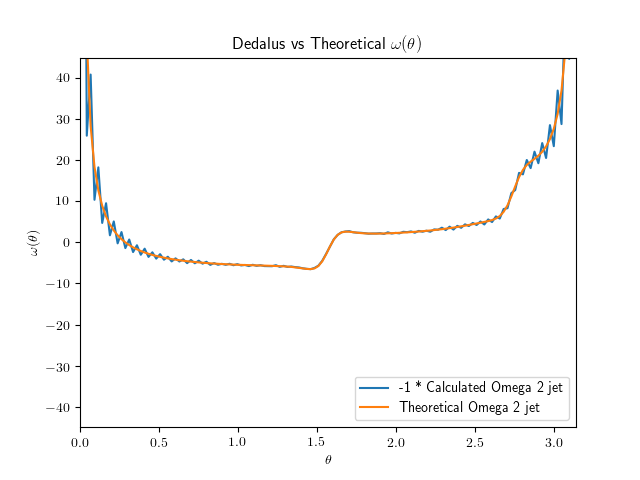

In [87]:
Gamma = 6*np.pi/5 # make Gamma negative to see how the graphs compare in value --- very close!
delta_th = 0.1



om_theo2_a = Gamma * ( ( (np.tanh(lat/delta_th)/2) + (lat*(1-np.tanh(lat/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat*np.tanh(lat/delta_th)/2) + np.pi/4)**2) + (cot( (lat*np.tanh(lat/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )
om_theo2_b = Gamma * ( ( (np.tanh(lat2/delta_th)/2) + (lat2*(1-np.tanh(lat2/delta_th)**2))/(2*delta_th) ) * (-1 - cot((lat2*np.tanh(lat2/delta_th)/2) + np.pi/4)**2) + (cot( (lat2*np.tanh(lat2/delta_th)/2) + np.pi/4)*cot(theta_theo) ) )
om_theo2 = -(om_theo2_a + om_theo2_b)



fig2 = plt.figure()
plt.rc('text', usetex=True)
plt.plot(theta_theo,-data2["om"][0,:],label = '-1 * Calculated Omega 2 jet') # note the negative in front of data2["om"]
plt.plot(theta_theo,om_theo2,label = 'Theoretical Omega 2 jet')
plt.xlim(0, np.pi)
plt.xlabel(r'\theta')
plt.ylim(-45,45)
plt.ylabel(r'\omega(\theta)')
plt.title('Dedalus vs Theoretical ' r'\omega(\theta)')
plt.legend(loc='lower right')